<a href="https://colab.research.google.com/github/aawaskita/BukuPython/blob/master/CNN_Fashion_MNIST_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import logging

(x_train, y_train), (x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


4423680/4422102 [==============================] - 0s 0us/step


In [4]:
x_train=x_train/255.0
x_test=x_test/255.0

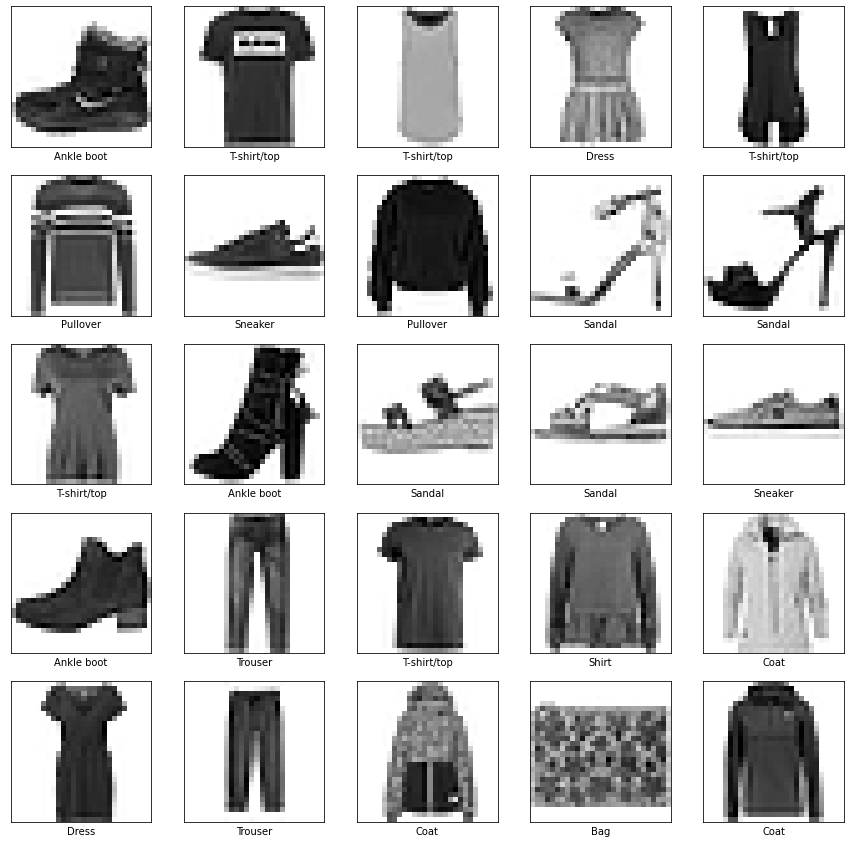

In [5]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
myModel=tf.keras.models.Sequential()

**Convolutional layer**

In [7]:
myModel.add(
    tf.keras.layers.Conv2D(
        filters=32, #how many filters we will learn
        kernel_size=(3,3), #size of feature map that will slide over image
        strides=(1,1), #how the feature map "steps" across the image
        padding='valid', #we are not using padding
        activation='relu', #Rectified Linier Unit Activation Function
        input_shape=(28,28,1) #the expected input shape for this layer
    )
)

**Maxpoll layer**

In [8]:
myModel.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2,2), #size feature will be mapped to
        strides=(2,2) #how the pool 'steps' accross the feature 
    )
)

**Dropout layer to prevent overfitting**

In [9]:
myModel.add(
    tf.keras.layers.Dropout(
        rate=0.25 #randomly disable 25% of neurons
    )
)

**From 3D to 1D**

In [10]:
myModel.add(
    tf.keras.layers.Flatten()
)

**Add dense layer to the end**

In [11]:
#A dense (interconnected) layer is added for mapping the derived features to the required class
myModel.add(
    tf.keras.layers.Dense(
        units=128, #Output shape
        activation='relu'
    )
)

#Final layer with 10 outputs and a softmax activation.
#Softmax activation enables me to calculate the output based on the probabilities
#Each class is assigned a probability and the class with the maximum probability is the model's output for the input
myModel.add(
    tf.keras.layers.Dense(
        units=10, #output shape
        activation='softmax'
    )
)

**Build the model**

In [12]:
myModel.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

myModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

**Train the CNN**

In [14]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
history=myModel.fit(
    x_train, y_train,
    batch_size=256,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
188/188 [==============================] - 23s 117ms/step - loss: 0.7780 - accuracy: 0.7363 - val_loss: 0.3724 - val_accuracy: 0.8716
Epoch 2/10
188/188 [==============================] - 27s 146ms/step - loss: 0.3611 - accuracy: 0.8744 - val_loss: 0.3383 - val_accuracy: 0.8813
Epoch 3/10
188/188 [==============================] - 22s 115ms/step - loss: 0.3119 - accuracy: 0.8901 - val_loss: 0.3210 - val_accuracy: 0.8882
Epoch 4/10
188/188 [==============================] - 21s 113ms/step - loss: 0.2888 - accuracy: 0.8975 - val_loss: 0.2912 - val_accuracy: 0.8942
Epoch 5/10
188/188 [==============================] - 21s 113ms/step - loss: 0.2668 - accuracy: 0.9027 - val_loss: 0.2836 - val_accuracy: 0.8967
Epoch 6/10
188/188 [==============================] - 21s 113ms/step - loss: 0.2501 - accuracy: 0.9100 - val_loss: 0.2835 - val_accuracy: 0.8973
Epoch 7/10
188/188 [==============================] - 21s 113ms/step - loss: 0.2404 - accuracy: 0.9113 - val_loss: 0.2606 - val_ac

In [18]:
predicted_class=myModel.predict_classes(x_test)
print(classification_report(y_test,predicted_class,target_names=class_names))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

 T-shirt/top       0.77      0.93      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.83      0.88      0.86      1000
       Dress       0.93      0.89      0.91      1000
        Coat       0.85      0.86      0.86      1000
      Sandal       0.96      0.99      0.98      1000
       Shirt       0.82      0.62      0.71      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

